In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
(x,y),(xt,yt)=cifar10.load_data()

170498071/170498071 [==============================] - 28s 0us/step


In [3]:
import matplotlib.pyplot as plt

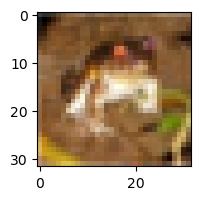

In [6]:
plt.figure(figsize=(2,2))
plt.imshow(x[0])

In [10]:
x[0].shape

(32, 32, 3)

In [8]:
x[0].shape

(32, 32, 3)

In [13]:
x[0].max(),x[0].min()

(255, 0)

In [14]:
import random

In [17]:
class_name=['airplane','automobile','bird','cat','deer','dog',
            'frog','horse','ship','truck']

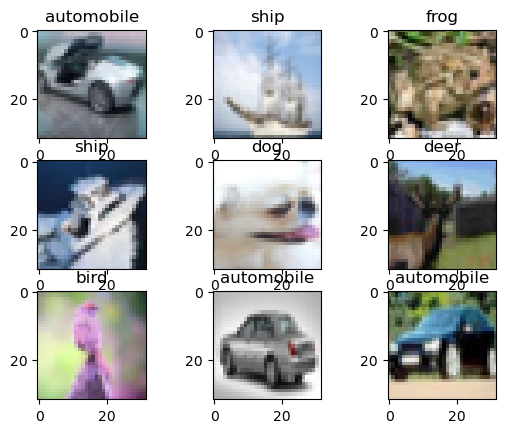

In [29]:
re = random.sample(range(len(x)),k=9)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[re[i]])
    plt.title(class_name[y[re[i]][0]])

In [39]:
model = tf.keras.Sequential([],name="conv_model")
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=x[0].shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20,activation='relu'))
model.add(tf.keras.layers.Dense(20,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = 'Adam',
    metrics = ['accuracy']
)

hist = model.fit(x,y,epochs=15)


Epoch 1/15


1563/1563 [==============================] - 13s 7ms/step - loss: 2.3511 - accuracy: 0.0966
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0994
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0977
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0977
Epoch 8/15
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0981
Epoch 9/15
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3028 - accuracy: 0.0997
Epoch 10/15
1563/1563 [==============================] - 12s 7ms/step 

In [40]:
x=x/255
xt=xt/255

In [42]:
model = tf.keras.Sequential([],name='Normalized_Model')
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=x[0].shape,activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = 'Adam',
    metrics = ['accuracy']
)

hist = model.fit(x,y,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6500 - accuracy: 0.3844
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2845 - accuracy: 0.5376
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1600 - accuracy: 0.5868
Epoch 4/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0804 - accuracy: 0.6160
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0269 - accuracy: 0.6343
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9830 - accuracy: 0.6505
Epoch 7/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9469 - accuracy: 0.6646
Epoch 8/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9121 - accuracy: 0.6772
Epoch 9/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8865 - accuracy: 0.6853
Epoch 10/15
1563/1563 [==============================] - 14s 9ms/step - l

In [43]:
model.evaluate(xt,yt)

313/313 [==============================] - 1s 3ms/step - loss: 0.9903 - accuracy: 0.6634


[0.9902739524841309, 0.6633999943733215]

In [44]:
y_pred = model.predict(xt)

313/313 [==============================] - 1s 3ms/step


In [45]:
y_pred[0]

array([6.5566605e-04, 1.9611719e-03, 4.9974117e-03, 4.0594804e-01,
       2.8888191e-05, 1.9315774e-02, 2.0745493e-02, 2.0390791e-05,
       5.4562819e-01, 6.9902308e-04], dtype=float32)

In [46]:
y_pred_index = y_pred.argmax(axis=1)

In [47]:
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(yt,y_pred_index,normalize='pred')

In [52]:
import seaborn as sns

<Axes: >

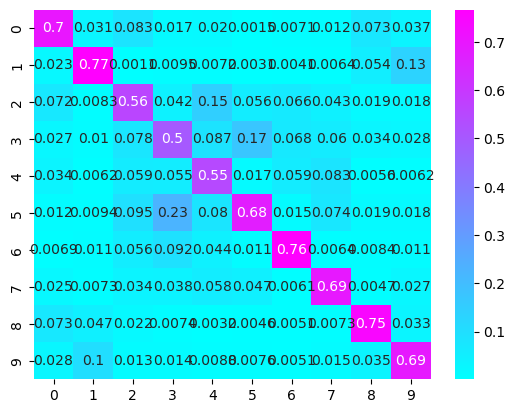

In [54]:
sns.heatmap(cm,annot=True,cmap=plt.cm.cool)